Training accuracy: 90.50%


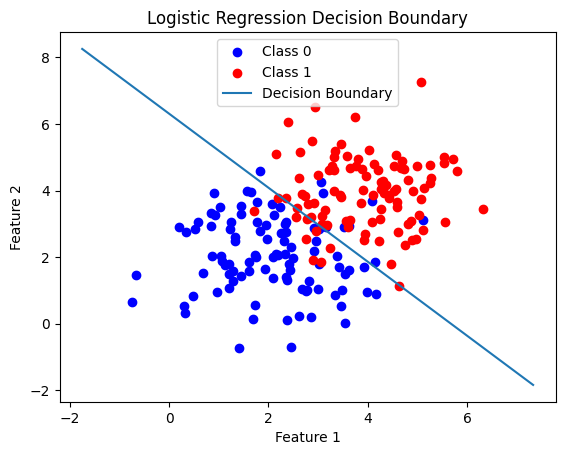

In [39]:
import numpy as np
import time
import matplotlib.pyplot as plt

np.random.seed(int(time.time()))
n_samples = 200

X0 = np.random.randn(n_samples // 2, 2) + np.array([2, 2])
Y0 = np.zeros(n_samples // 2)

X1 = np.random.randn(n_samples // 2, 2) + np.array([4, 4])
Y1 = np.ones(n_samples // 2)

X = np.vstack([X0, X1])
Y = np.concatenate([Y0, Y1])

m, n = X.shape
X = np.c_[np.ones((m, 1)), X]  # Add x0 = 1 to each instance

theta = np.zeros(n + 1)
alpha = 0.1
n_iters = 10000

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

for it in range(n_iters):
    gradients = X.T.dot(sigmoid(X.dot(theta)) - Y) / m
    theta = theta - alpha * gradients

# 5) Evaluate accuracy
probs = sigmoid(X.dot(theta))
y_pred = (probs >= 0.5).astype(int)
accuracy = np.mean(y_pred == Y)
print(f"Training accuracy: {accuracy * 100:.2f}%")

# 6) Plot data and decision boundary
plt.figure()
plt.scatter(X0[:, 0], X0[:, 1], color='blue', label='Class 0')
plt.scatter(X1[:, 0], X1[:, 1], color='red', label='Class 1')

# Decision boundary: theta0 + theta1*x1 + theta2*x2 = 0 => x2 = -(theta0 + theta1*x1)/theta2
x_values = np.array([X[:, 1].min() - 1, X[:, 1].max() + 1])
y_values = -(theta[0] + theta[1] * x_values) / theta[2]
plt.plot(x_values, y_values, label='Decision Boundary')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.legend()
plt.show()
